In [2]:
from langchain_chroma import Chroma
import torch
from langchain_core.documents import Document
from langchain_huggingface import HuggingFaceEmbeddings
import json
from langchain.text_splitter import RecursiveCharacterTextSplitter
import matplotlib.pyplot as plt
import seaborn as sns
from uuid import uuid4

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [4]:
# найти нормальную модель энкодер для эмбеддингов

embedding_model = HuggingFaceEmbeddings(
    model_name="intfloat/multilingual-e5-large",
    model_kwargs={
        "device": device,
    },
    cache_folder="./models",
)

In [5]:
a = embedding_model.embed_documents("Hello, Motherfucker!")

In [6]:
store = Chroma(
    collection_name="posts",
    embedding_function=embedding_model,
    persist_directory="./posts_db",
)

In [7]:
store._client.get_collection("posts")

Collection(name=posts)

In [17]:
not store._client.get_collection("posts")

False

In [5]:
with open('datasets/wos.json', 'r', encoding='utf-8') as file:
    data = json.load(file)


In [6]:
type(data[0])

dict

In [7]:
data

[{'source': 'medium',
  'file': '35-korotkih-mysli-04-15.html',
  'text': '3.5 коротких мысли\nВ приватной беседе меня спросили: «Юра, ну вот ты говоришь все время, анклав, анклав, а не понимаю, зачем мне строить анклав. Мне и так неплохо, я хорошо зарабатываю, проблемы от меня далеко — зачем мне анклав?»\nВсе правильно: если сейчас анклав не кажется выгодным — то строить его не нужно.\nЭто тоже вопрос фокуса. Можно, конечно, сподвигать к строительству анклава эмоциональными манипуляциями, запугиванием, обещаниями Эдема в анклаве и Апокалипсиса за его пределами. Это будет означать внутренний фокус у строителя анклава — вместо решения реальной проблемы того, что анклав прямо сейчас не выгоден, он будет компенсировать эту невыгоду эмоциональным нагнетанием. Как это кончится? Сектой, стерлиговщиной и пиздецом.\nУ нас вот есть в чате один кадр, предлагающий чуть ли не сейчас уходить в леса, рыть землянки и сажать там картошку — вот, мол, анклав, полная свобода, никакого плебса. В голове мг

In [19]:
texts = [post["text"] for post in data]

In [9]:
print(texts[10])

Короткие мысли - июнь
Маргинализация правых
Потрясает новость обвинительного приговора Трампу в деле о неправильно оформленной бухгалтерии. Это колоссальный путевой столб в набирающей обороты войне мейнстрима против правых, который происходит и в Германии тоже: у нас, например, начали уголовную проверку за песенку «Иностранцев — вон, Германию — немцам», что тоже новая высота по сравнению с вызовом полиции в школу за тикток со смурфиками (которые, по утверждению автора тиктока, синие также, как и Германия, а криминал здесь в том, что это также партийный цвет АфД), и даже по сравнению с отменой коммунальных выборов, где победил неправильный кандидат, из-за неправильно оформленной документации.
Дело против Трампа — это очевидное дело Кировлеса, это еще раз подтверждает самим же Трампом высказанную мысль о том, что он — это американский Навальный. Да, именно так все и есть — что бы там по этому поводу не думало продавшееся мейнстримщикам ФБК. И тут я хочу снова вернуться к аналогии, котору

In [8]:
splitter = RecursiveCharacterTextSplitter(
    chunk_size=1000,
    chunk_overlap=50,
)

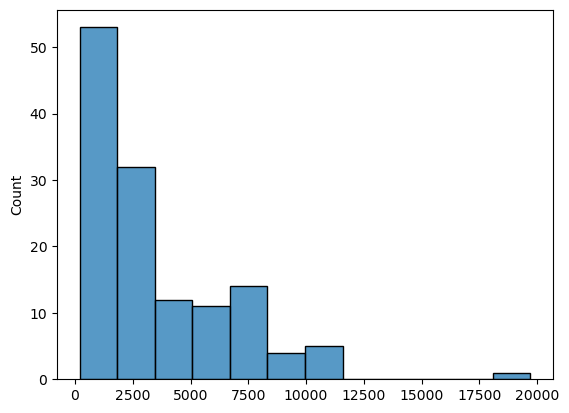

In [20]:
len_texts = [len(text.split()) for text in texts]

sns.histplot(len_texts)
plt.show()

In [13]:
docs = []
ids = []

for post in data:
    chunks = splitter.split_text(post["text"])
    for chunk in chunks:
        document = Document(
            page_content=chunk,
            metadata={"source": post["source"], "file": post["file"]}
        )
        docs.append(document)
        ids.append(str(uuid4()))

store.add_documents(documents=docs, ids=ids)


['46e746e2-85b0-4cf0-a806-01e563266e73',
 'bccd1f50-9d44-4055-8168-2c6204cea57b',
 'b45b23cb-9d54-4a01-8f60-6040ddf76070',
 'c737eee0-2bc6-4e6f-8257-785b325640bc',
 '24d547ec-a8bb-4ff2-8b78-59a60e07064b',
 'c41b4d1c-0d51-45a6-b9ad-648476a5b880',
 '61d7434d-b4bc-4782-88d1-a8275a15c200',
 '8963c0bc-1418-45f8-a4d9-7f30060d2e0d',
 '31d7d228-99ab-4a25-aa64-aada3f0fcbab',
 '8010df58-70b1-48f0-9922-e01fcff01c71',
 '962066f1-db36-4210-a1ad-21a901e61a7a',
 '77b9faa7-8614-4c99-b31a-4aa39f957922',
 '8595af9f-a99e-47d2-a39b-288a18e87f60',
 'a06dfafd-a148-458d-bfdb-1cbc7e31dd56',
 '2271c0f2-b20d-43a3-a693-9200a16072ba',
 'debee7d1-e39e-4ddf-a5b4-24f645f56d03',
 'a82e8fd9-be24-47eb-accd-8768c9635f03',
 '52d7dd9d-77ae-4cfa-a266-861f04936931',
 '28bc045b-b4f7-4bd1-90a6-3bf20ee79c2c',
 'b8fbf919-891b-4f3b-964e-789327ce2a35',
 '9886d7e2-5a85-4391-a5fc-8b9a5417d751',
 '556b9b98-09ad-4c49-af6b-8a1af1bf244a',
 'c78094f3-58ad-43f7-a75a-635089265569',
 '1e2a9557-c4b5-4aba-9003-125e3490686c',
 'fcd2f10e-4778-

In [21]:
import shutil

shutil.make_archive("store_backup", 'zip', "./posts_db")

'c:\\Users\\Arseniy\\Desktop\\kaia\\brainbox\\deciders\\RAG\\post_search\\research\\store_backup.zip'

In [14]:
results = store.similarity_search(
    "Что писалось про съемки курса Основы программирования?",
    k=5,
)

In [20]:
results[0].metadata

{'file': 'e93a8a020240.html', 'source': 'medium'}

In [28]:
results

[(Document(id='87847b2b-a4c2-40a1-bae0-2ca858c06798', metadata={'file': 'e93a8a020240.html', 'source': 'medium'}, page_content='А переснимать трудно. Во-первых, это просто тяжелая работа. Продумывание планов лекции, примеров, съемка этих дублей бесконечных, когда какую-нибудь херню ляпнешь и приходится снова говорить — я, честно говоря, как вспомню, так вздрогну. Мне очень нравится результат, но его достижение было неприятным. Да, этот процесс можно существенно улучшить командой ассистентов и методистов, но даже так, я бы на него второй раз не подписался.\nВо-вторых, будет тяжело из-за того, что это уже не ново. Я во многом выезжал на ощущении классности происходящего: «мы создаем лучший в стране курс по основам программирования!». Пересъемка курса со свежими примерами — занятие бесконечно более унылое, по крайней мере, для меня; это такая работа, которую делать объективно нужно, но которая не заводит и не вставляет. Есть люди, которые хорошо справляются с такой работой, но в них, по м

In [31]:
print(results[1][0].page_content)

В Контуре мы начали с записи двух семестров «Основ программирования», базового предмета, который читался на первом курсе у всех компьютерных специальностей факультета. С технической точки зрения это была уже рутина: пришел, включил свет, надел микрофон, включил запись экрана, камеру — и вперед. Так что инновации в основном обеспечивал ПВЕ, который всегда был полон идей о различных интерактивностях: мини-задачи, анки, комментарии — это все его идеи и реализации, о которых я даже мало знал поначалу, потому что все еще сидел в университете, приезжая в Контур лишь изредка.


In [9]:
from concurrent.futures import ThreadPoolExecutor, as_completed

docs = []
ids = []
for post in data:
    chunks = splitter.split_text(post["text"])
    for chunk in chunks:
        document = Document(
            page_content=chunk,
            metadata={
                "source": post["source"],
                "file": post["file"],
            }
        )
        docs.append(document)
        ids.append(str(uuid4()))

chunk_size = 100
doc_chunks = [docs[i:i + chunk_size] for i in range(0, len(docs), chunk_size)]
uuid_chunks = [ids[i:i + chunk_size] for i in range(0, len(ids), chunk_size)]

In [10]:
def initialize_chroma_client():
    return Chroma(
        persist_directory="chroma-db",
        embedding_function=embedding_model,
        collection_name="chroma"
    )

In [11]:
def add_documents_to_chroma(documents, ids):
    chroma_client = initialize_chroma_client()
    chroma_client.add_documents(documents=documents, ids=ids)

In [13]:
import chromadb

chromadb.api.client.SharedSystemClient.clear_system_cache()

In [14]:
with ThreadPoolExecutor(max_workers=10) as executor:
    futures = [
        executor.submit(add_documents_to_chroma, docs, ids)
        for docs, ids in zip(doc_chunks, uuid_chunks)
    ]

    for future in as_completed(futures):
        try:
            future.result()
        except Exception as e:
            print(f"Ошибка при добавлении документов: {e}")